In [22]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [23]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [24]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

# Read flowers images from disk into numpy array using opencv

In [25]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [26]:

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [27]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [21]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

# preprocessing: Image scaling

In [31]:

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
X_test[0].shape


(224, 224, 3)

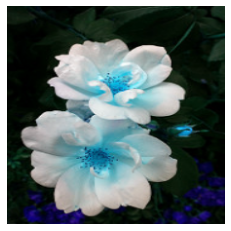

In [33]:
plt.axis('off')
plt.imshow(X[0])

In [35]:
feature_extractor_model ="https://tfhub.dev/google/imagenet/inception_v3/classification/5"

pretrained_model_without_top_layer =hub.KerasLayer(
                                    feature_extractor_model, 
                                    input_shape=(224, 224, 3),trainable=False) # Can be True

In [36]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              23853833  
_________________________________________________________________
dense (Dense)                (None, 5)                 5010      
Total params: 23,858,843
Trainable params: 5,010
Non-trainable params: 23,853,833
_________________________________________________________________


In [38]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 183s 2s/step - loss: 0.9465 - acc: 0.6959
Epoch 2/5
86/86 [==============================] - 215s 2s/step - loss: 0.5053 - acc: 0.8176
Epoch 3/5
86/86 [==============================] - 216s 3s/step - loss: 0.4068 - acc: 0.8525
Epoch 4/5
86/86 [==============================] - 210s 2s/step - loss: 0.3494 - acc: 0.8794
Epoch 5/5
86/86 [==============================] - 201s 2s/step - loss: 0.3103 - acc: 0.8943


In [39]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 72s 2s/step - loss: 0.5294 - acc: 0.8159


[0.5293682813644409, 0.8159041404724121]

In [40]:
model.save("../models/inception_v3.h5")